In [1]:
import rasterio
from rasterio.io import MemoryFile
from rasterio.mask import mask
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.merge import merge
from rasterio.features import shapes
import datetime
import matplotlib.pyplot as plt
import numpy as np
from rasterio import features
import time
import pandas as pd

import rasterio
from pathlib import Path

import argparse

import geopandas as gpd

import utm
import sys
import os

In [2]:
root = '/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data'

In [3]:
ids = pd.read_csv(f'{root}/preprocessing/Glacier_list.csv',header=2)['RGI index']

In [ ]:
for Id in ids:

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



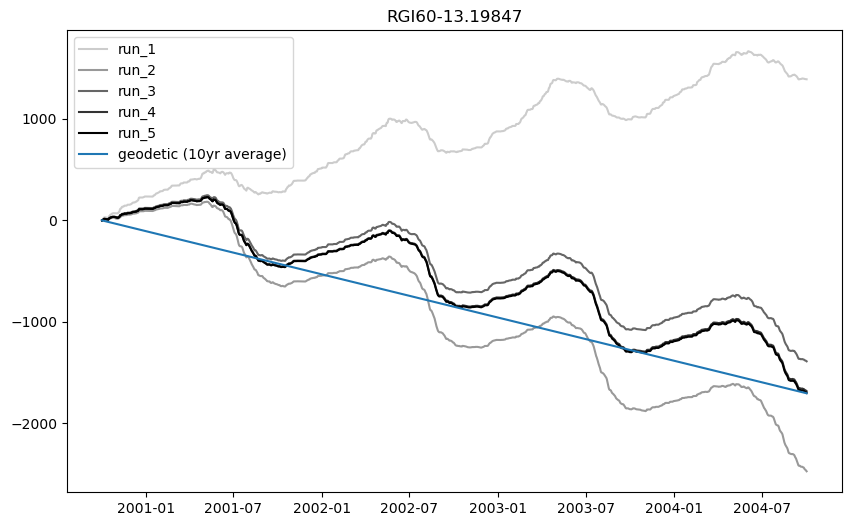

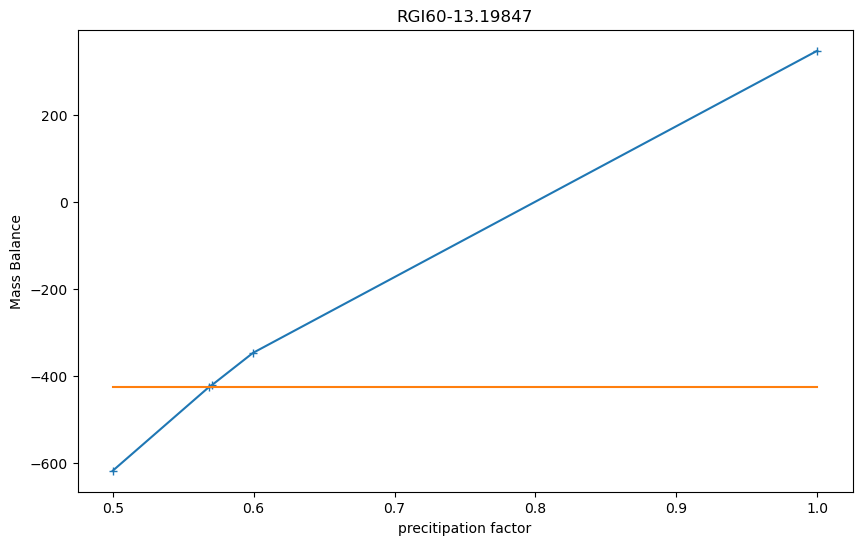

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 24 25
 26 27 28 29]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


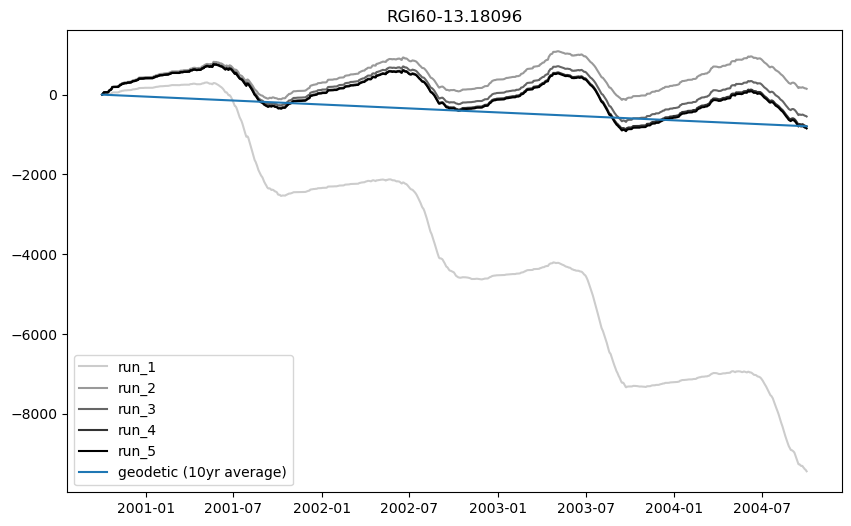

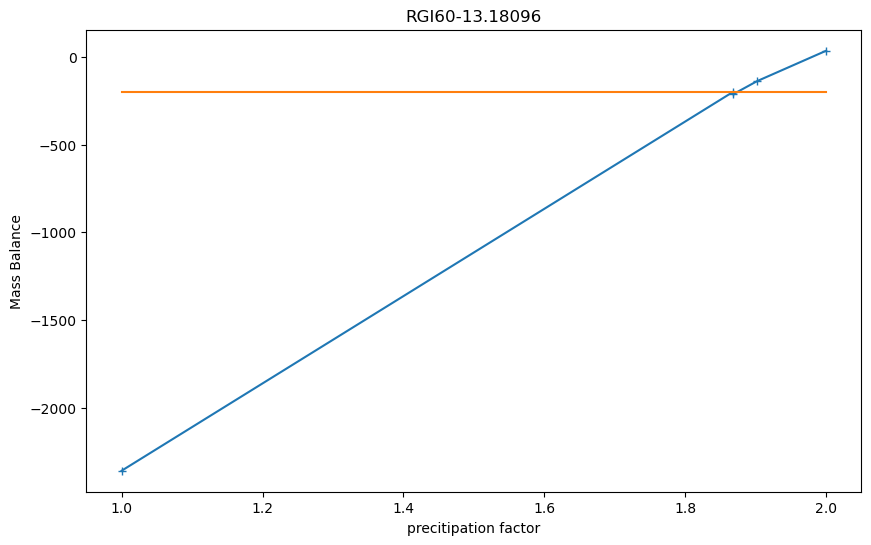

/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


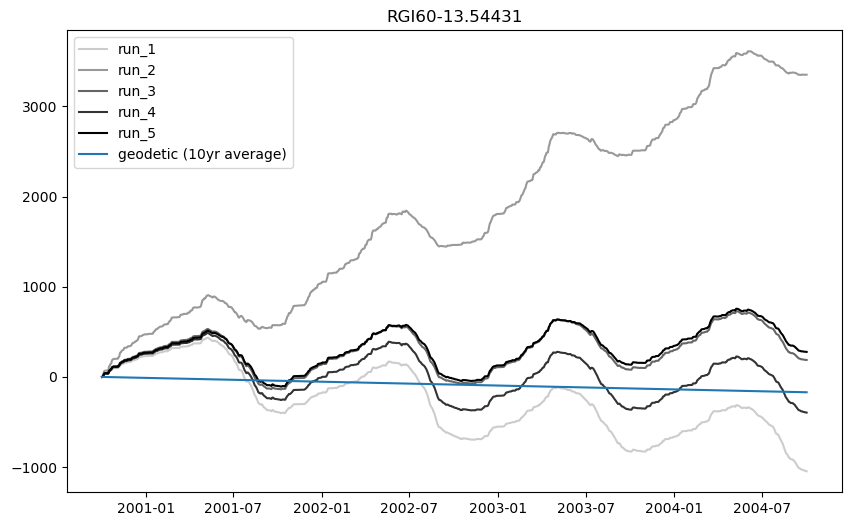

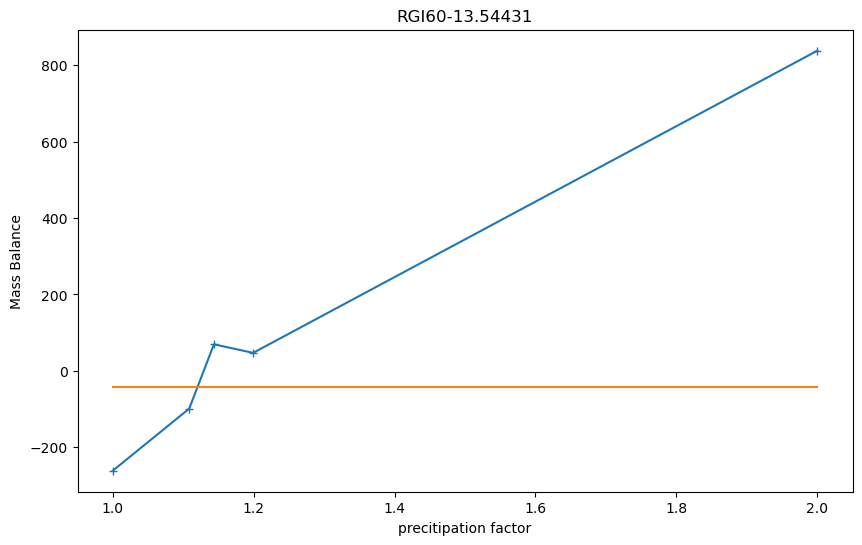

/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29 30]

[ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



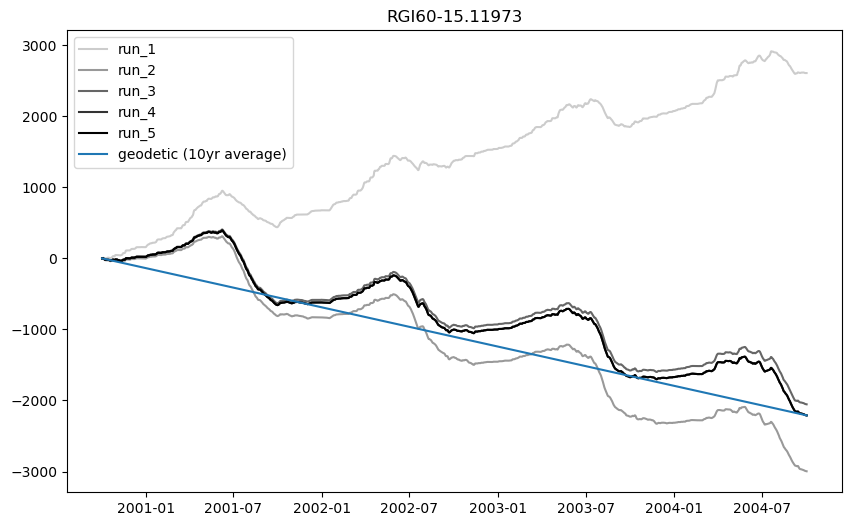

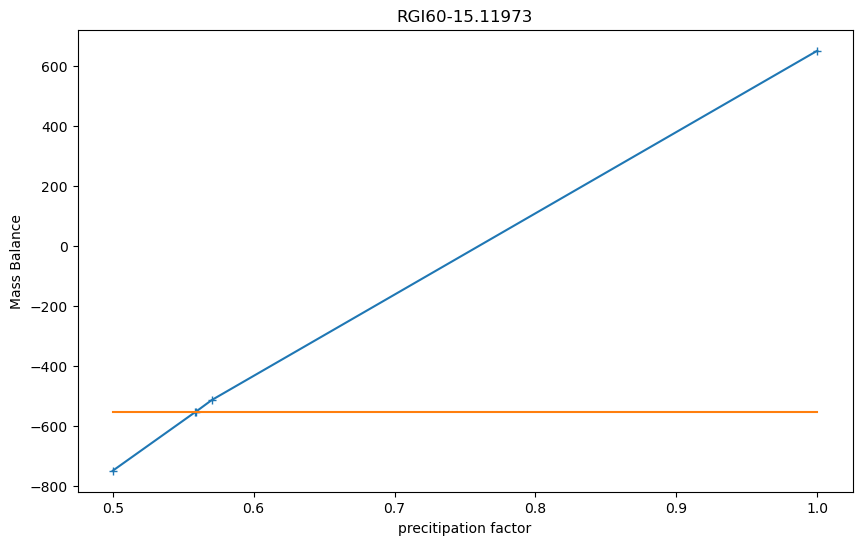

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



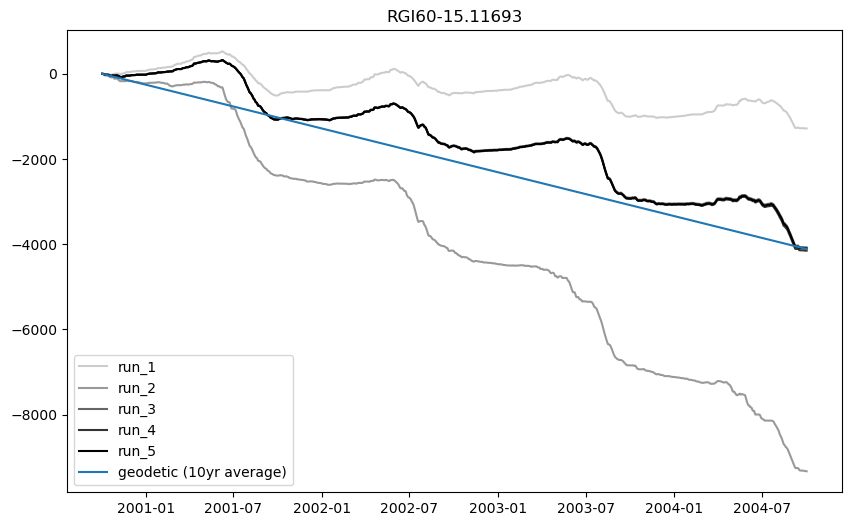

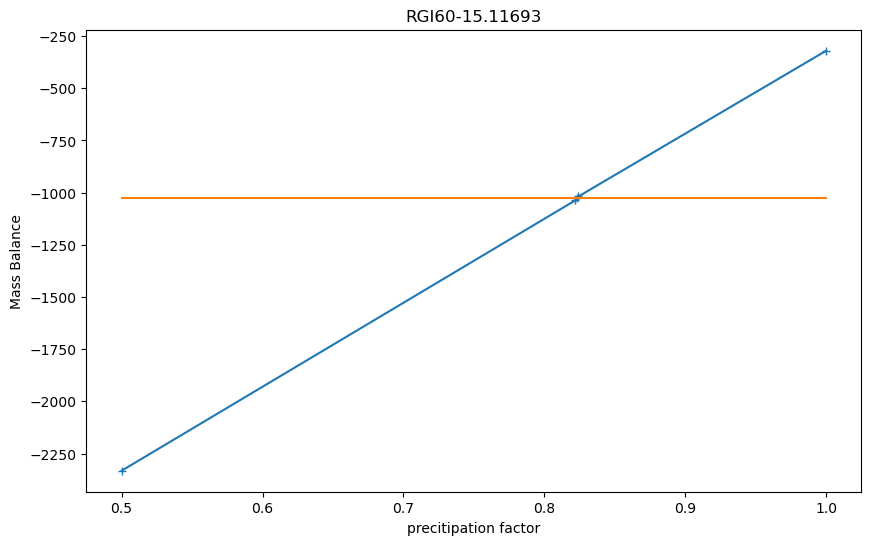

/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



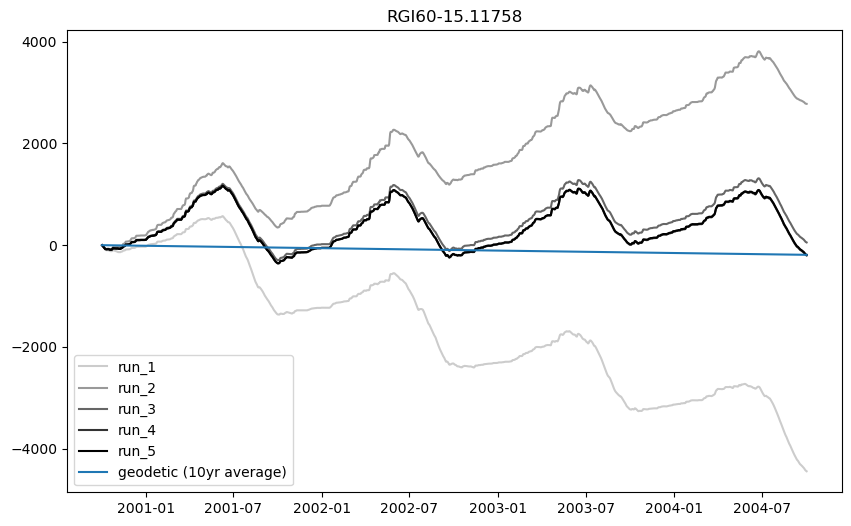

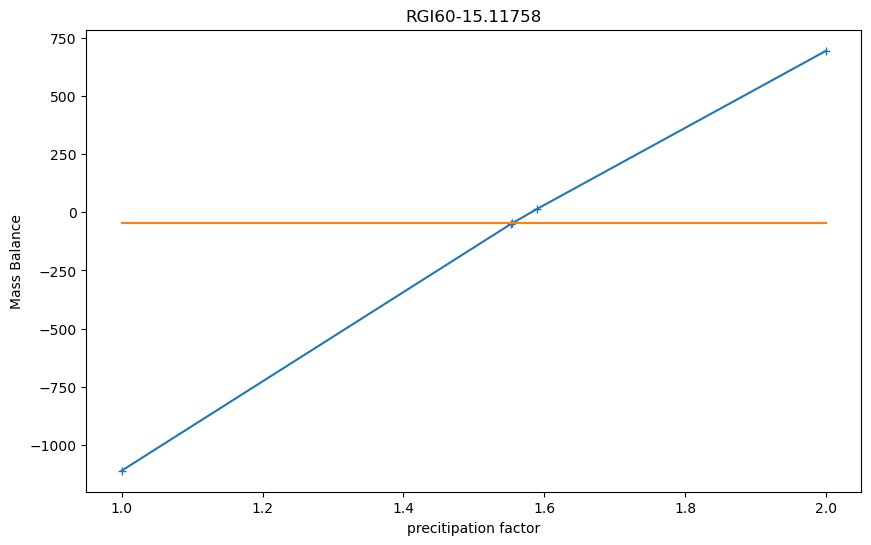

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



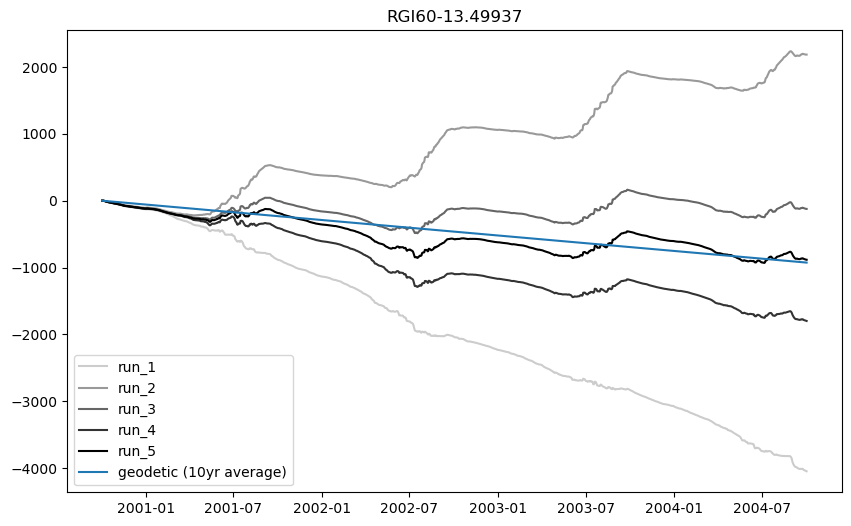

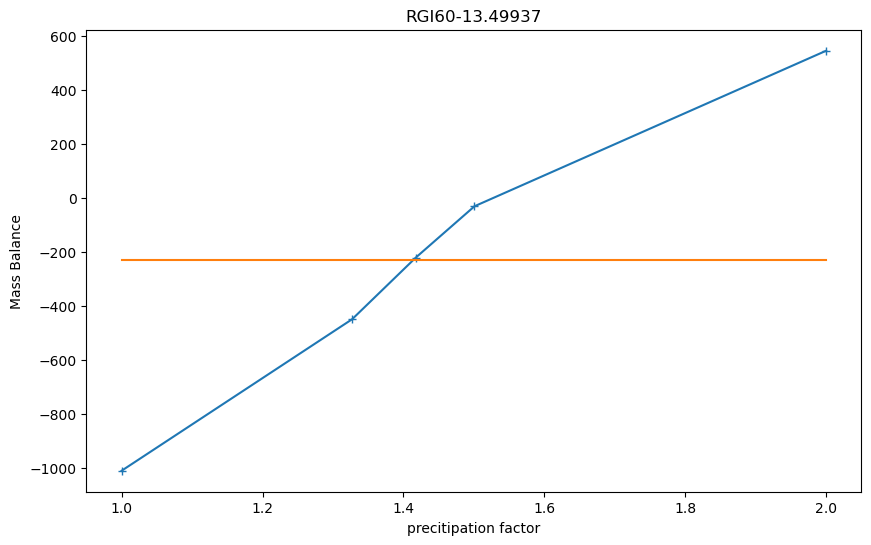

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 25
 26 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


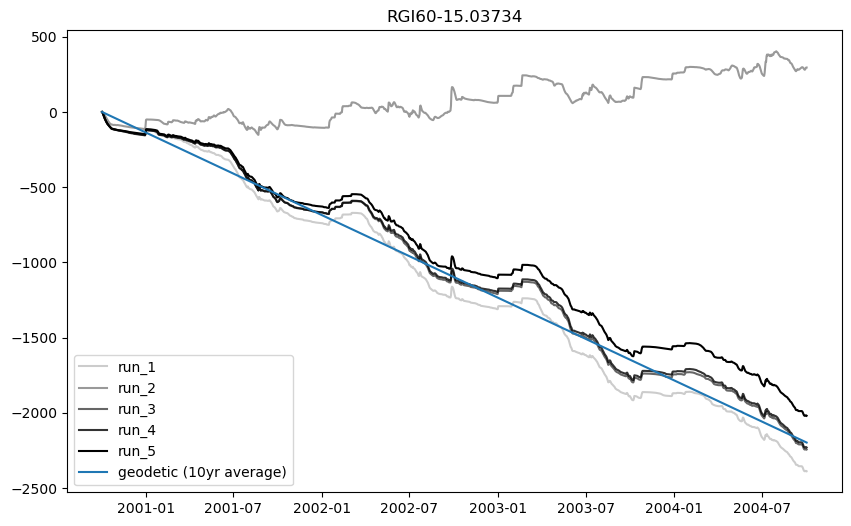

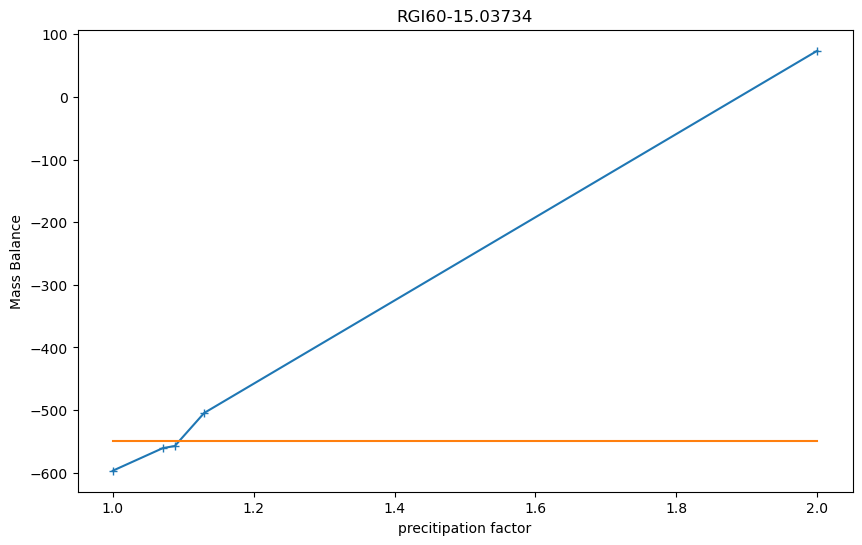

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25
 26 27 28 29]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]



/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29]



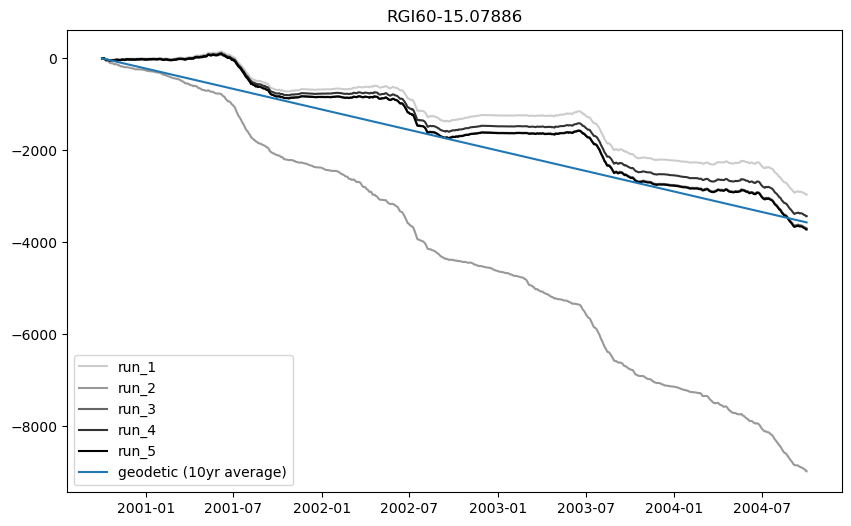

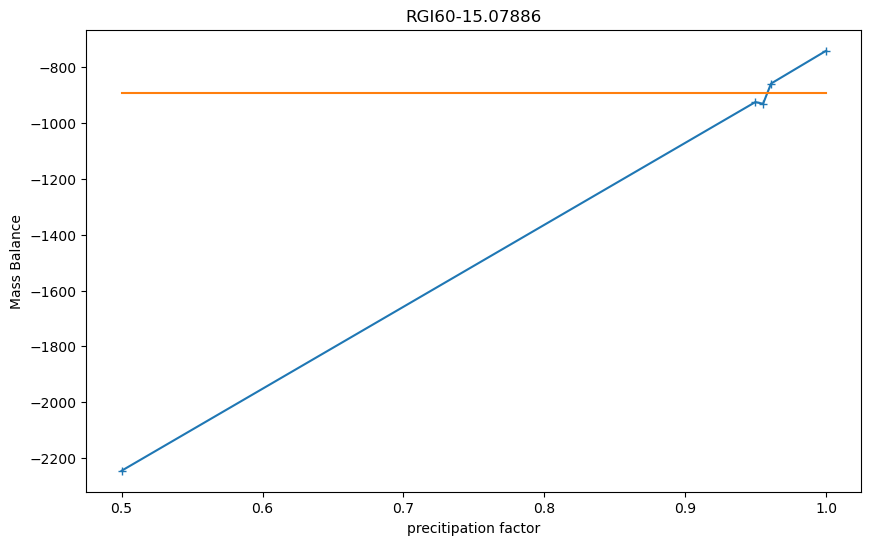

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]



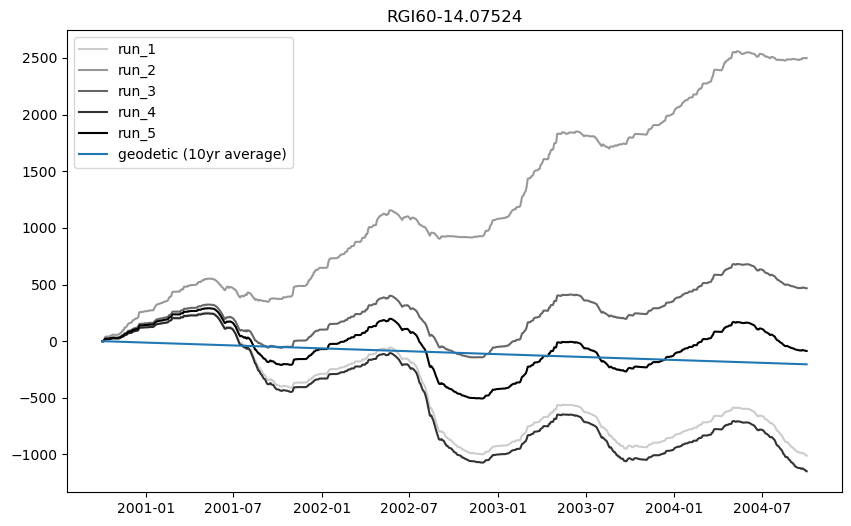

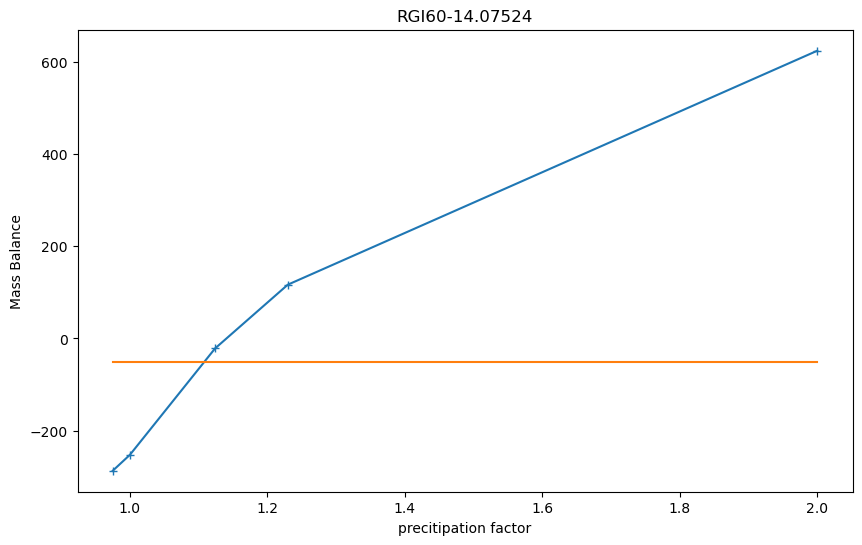

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



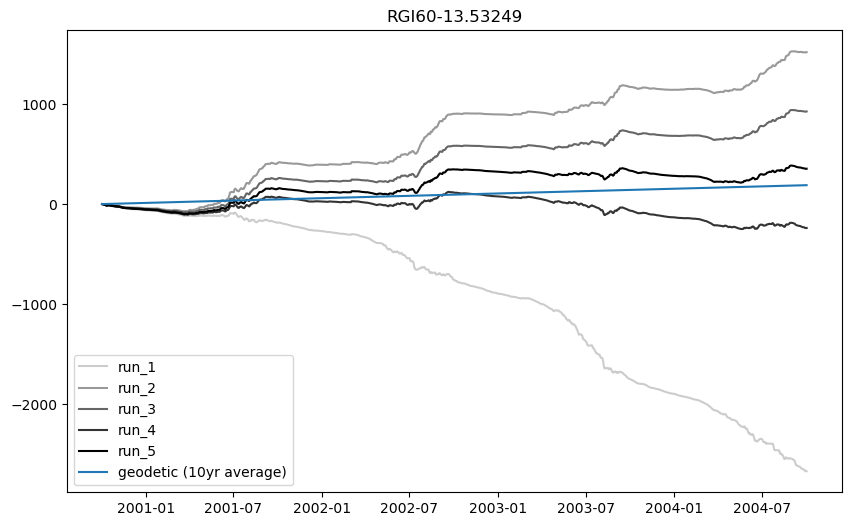

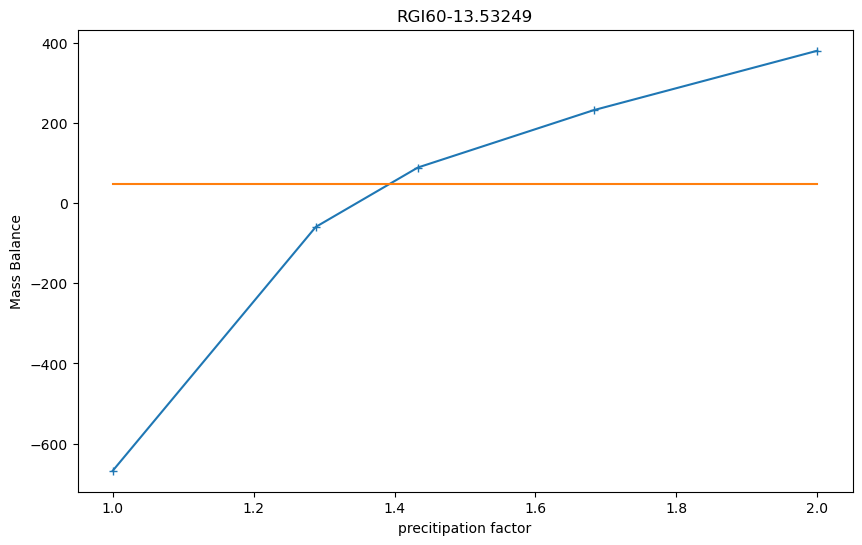

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



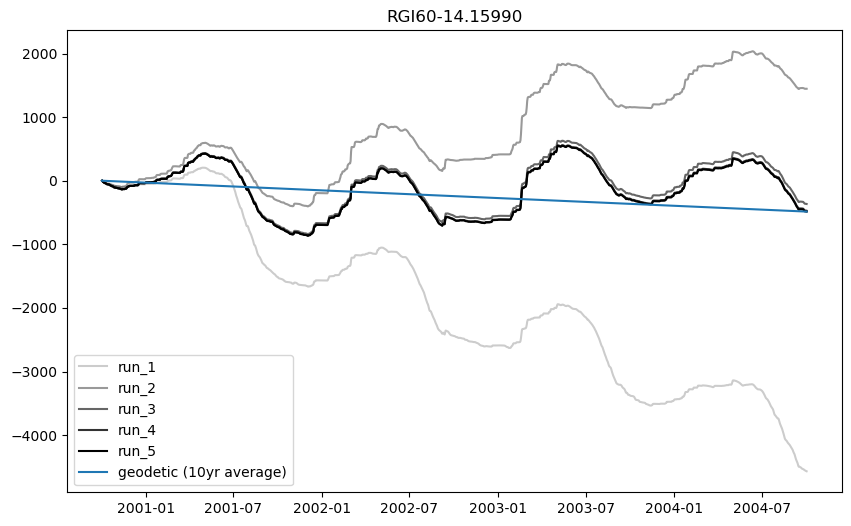

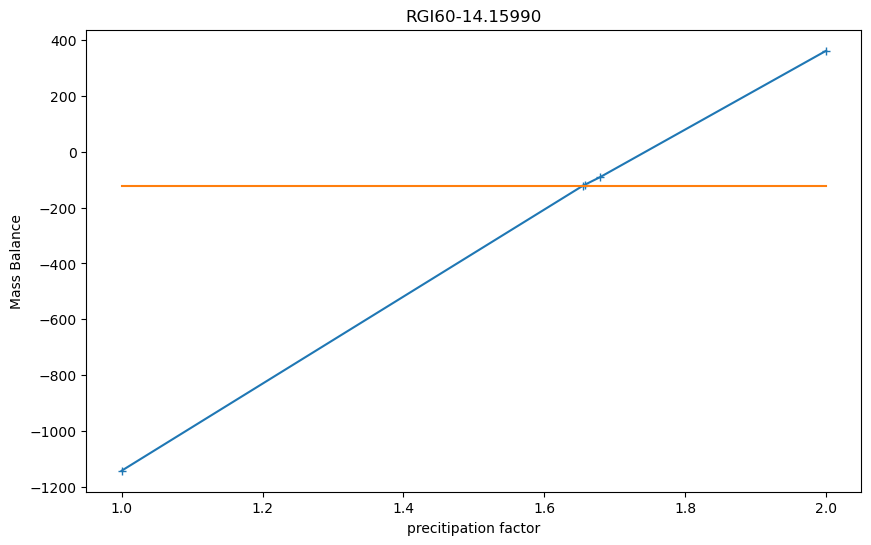

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



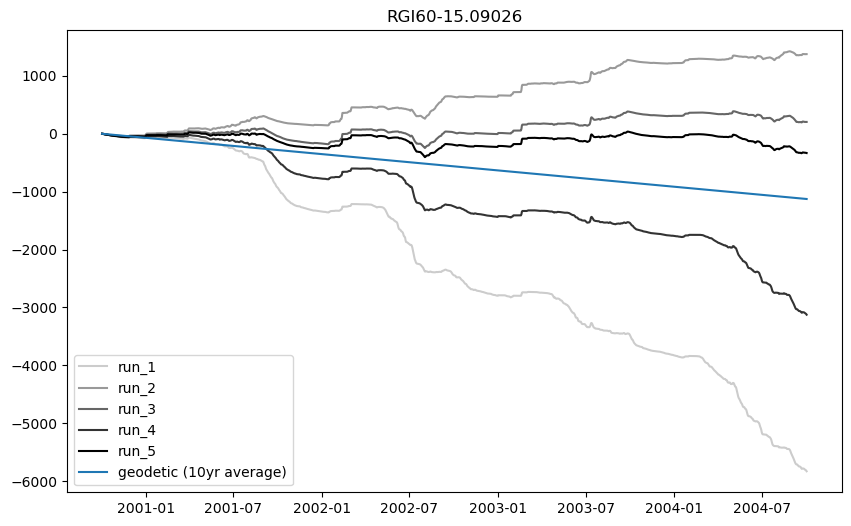

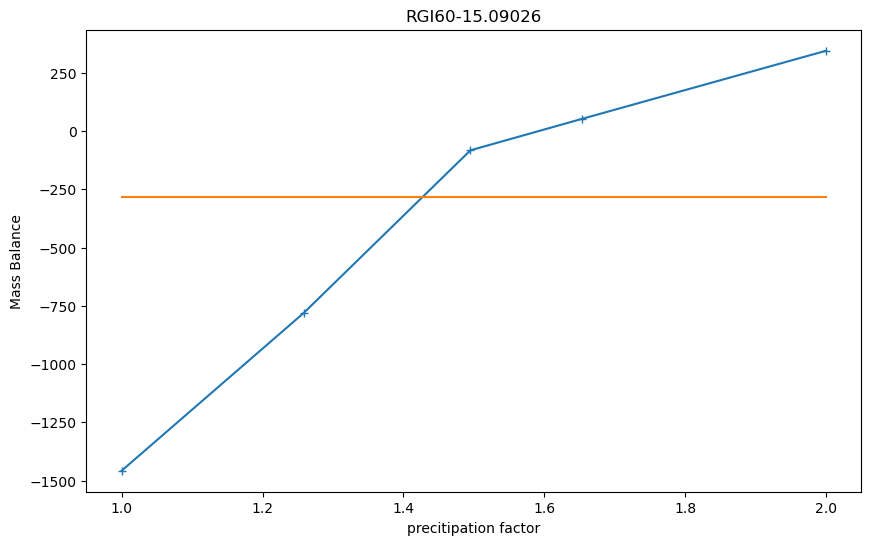

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27]



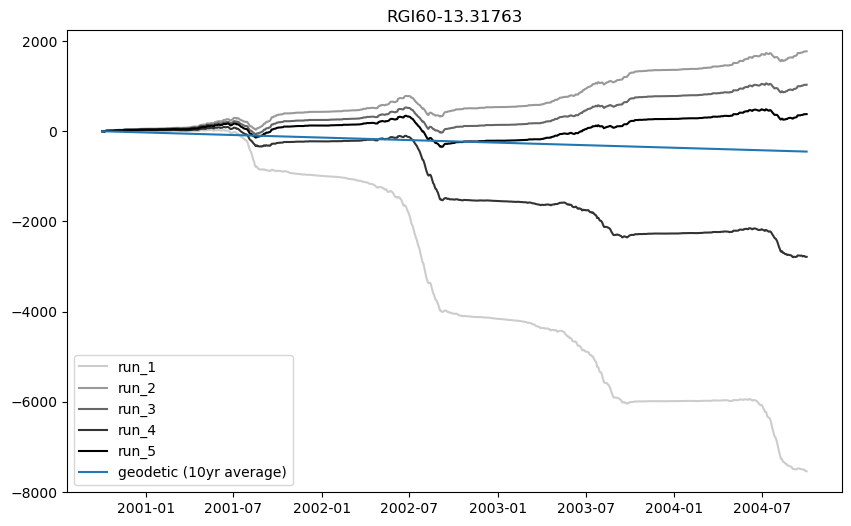

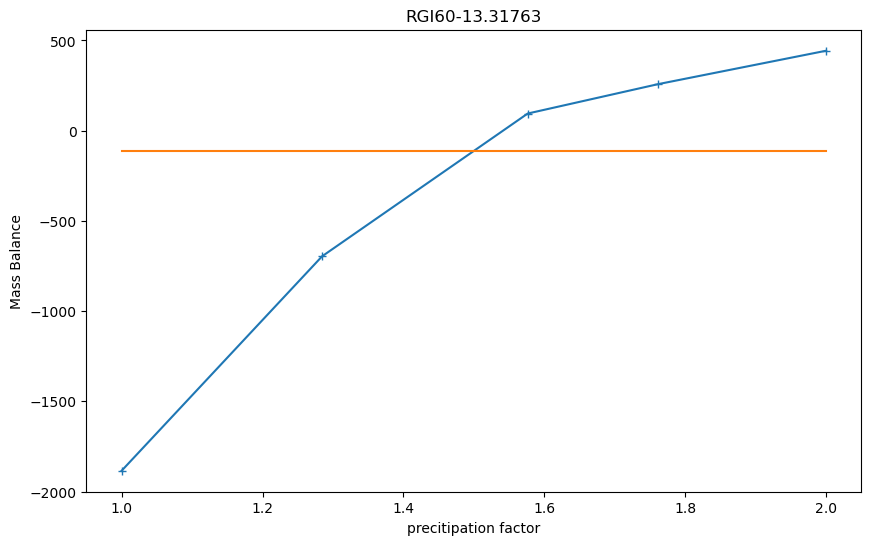

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]



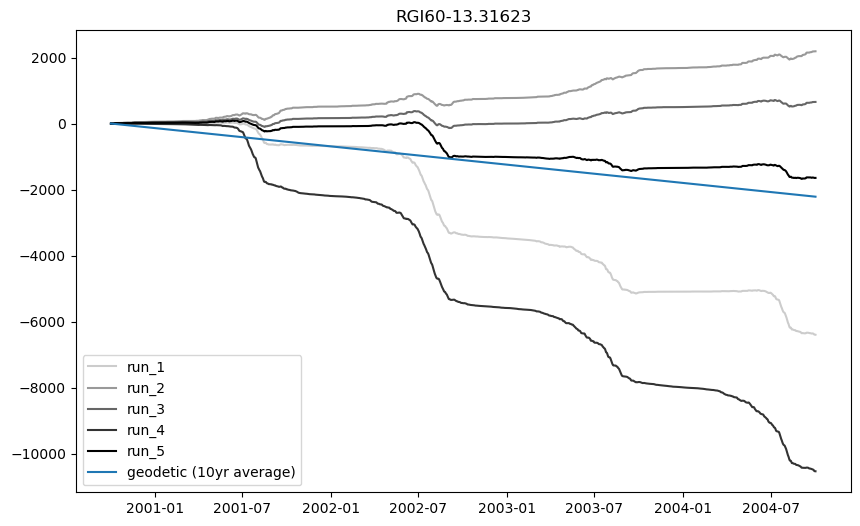

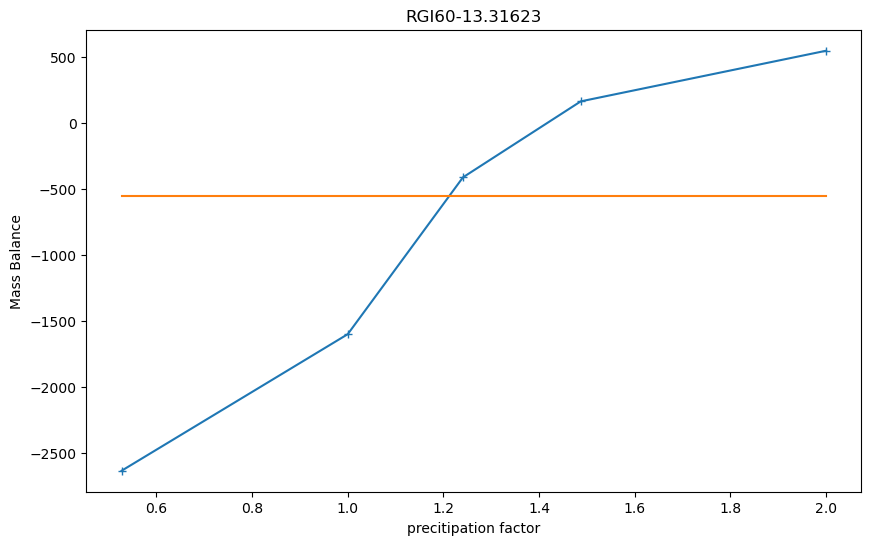

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 23 24 25 26
 27 28 29]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]



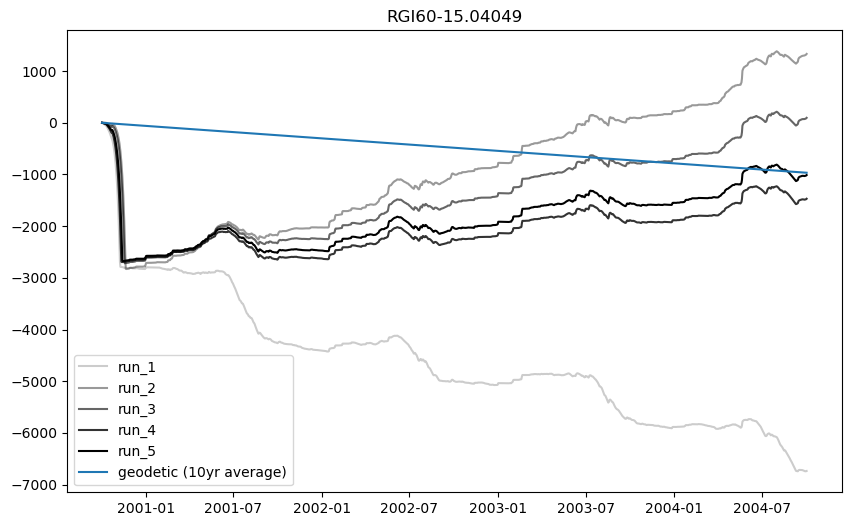

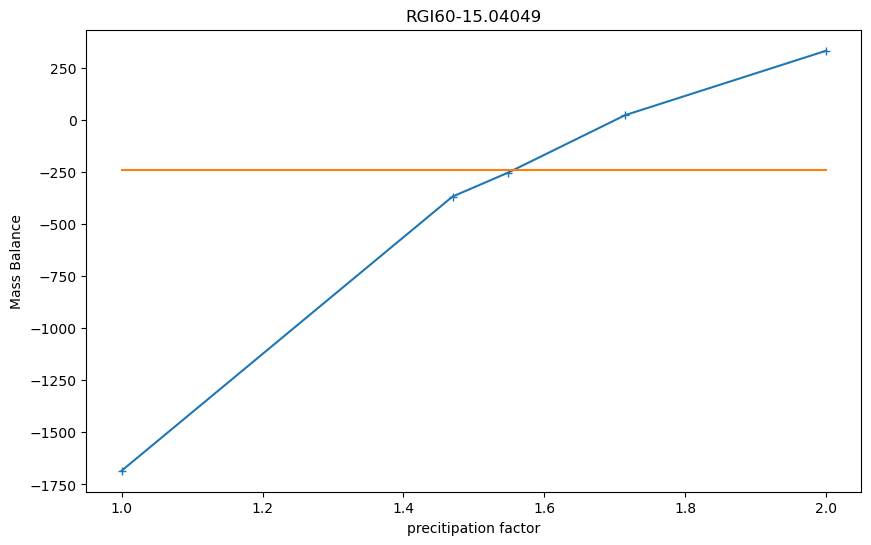

/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 27 28 29 30]

[ 1  2  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 21 22 23 24 25
 26 27 28 29 30]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


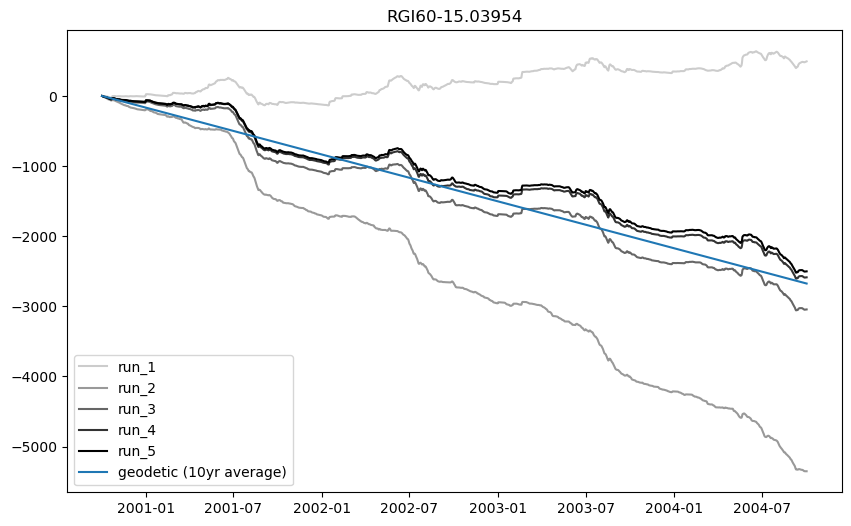

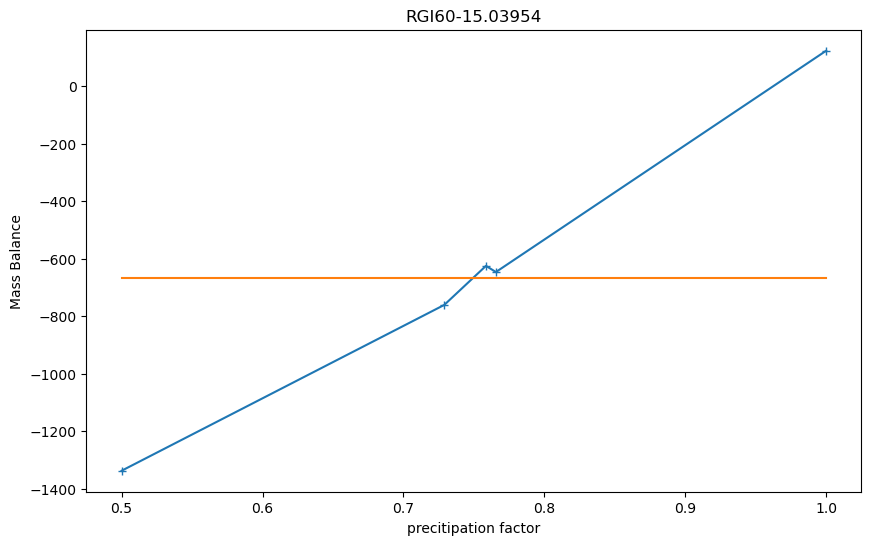

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 20 21 22 23 24 25
 26 27 28 29]


/tmp/ipykernel_3463455/1613665028.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)



[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29]



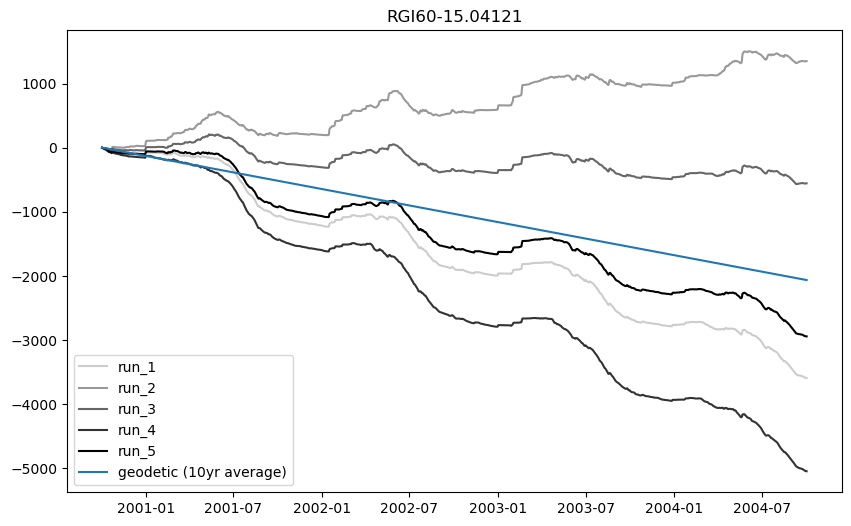

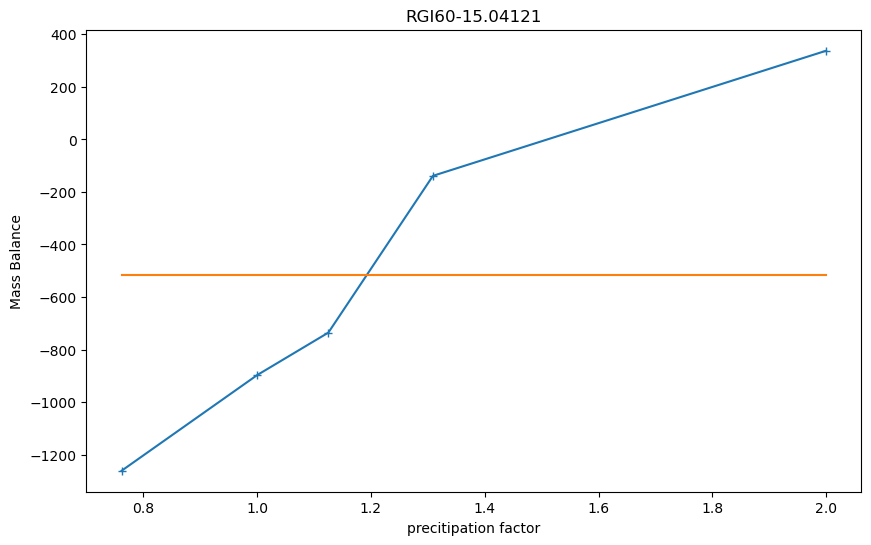

In [8]:
perc_error = []
for Id in ids:


    fig = plt.figure(figsize  = (10,6))
    plt.title(Id)


    itera_mb = []
    # Id = 'RGI60-15.07886'
    region_num = Id.split('-')[1][0:2]   # extract RGI region number from Id
    Id_num = Id.split('-')[1]
    region_names = {
        '13':'CentralAsia',
        '14':'SouthAsiaWest',
        '15':'SouthAsiaEast'
    }
    
    p_mod_path = f'{root}/Outputs/{Id}/tp_calib.csv'
    df_p_mod = pd.read_csv(p_mod_path).iloc[:5]

    run_names = df_p_mod['p_fact']


    ########now load model output
    #first check if all glacier points ran
    points_all = pd.read_csv(f'{root}/preprocessing/All_glaciers/{Id}/coords_out_{Id}.csv',header=1)
    num_points = len(points_all)


    for j,run_name in enumerate(run_names):
        j+=1
        run_name = f'run_{run_name:.3f}'
        paths_out = np.array([f'{root}/Outputs/{Id}/{run_name}/{point_i+1}_results.parquet' for point_i in range(num_points)])
        # print(paths_out[0])
        #calculate mass change per m^2 (using weights)
        #then multiply by area total

        exist_files = np.array([os.path.isfile(p) for p in paths_out])
        if all(exist_files) == False:
            # print(f"points_not computed {np.arange(1,num_points+1,1)[~exist_files].astype(int)}")
            pass
            
            

        else:
            # print('all files exist')
            pass

        #drop not computed, then recompute weights
        points_computed_list = np.arange(1,num_points+1,1)[exist_files].astype(int)
        points_computed_df = points_all[exist_files]
        points_computed_df.weight = points_computed_df.weight/np.nansum(points_computed_df.weight)


        print(points_computed_list)
        if not any(points_computed_list):
            print('any')
            print('No outputs')
        else:
            for i,point_id in enumerate(points_computed_list):
                
                out_file = pd.read_parquet(f'{root}/Outputs/{Id}/{run_name}/{point_id}_results.parquet')
                #remove spin up
                date_start = out_file.Date.iloc[0]
                date_spin_complete = date_start + datetime.timedelta(days = 30)
                date_end =date_spin_complete + datetime.timedelta(days = 365*4+1)
                out_file = out_file[(out_file.Date>date_spin_complete)&(out_file.Date<=date_end)]


                if i==0:
                    ice_we = (out_file.ICE-out_file.ICE.iloc[0])*points_computed_df.weight.iloc[i]
                    snow_we = (out_file.SWE-out_file.SWE.iloc[0])*points_computed_df.weight.iloc[i]
                    
                else:
                    ice_we += (out_file.ICE-out_file.ICE.iloc[0])*points_computed_df.weight.iloc[i]
                    snow_we += (out_file.SWE-out_file.SWE.iloc[0])*points_computed_df.weight.iloc[i]


            total_mb = ice_we+snow_we   #(kg per m^2)

            hugonnet_path = f'{root}/postprocessing/Hugonnet_2021/dh_{region_num}_rgi60_pergla_rates.parquet'
            glacier_data = pd.read_parquet(hugonnet_path,filters = [('rgiid','==',Id),('period','==','2000-01-01_2010-01-01')],engine="pyarrow")
            model_mb = (total_mb.iloc[-1]*1/4) 
            itera_mb.append(model_mb)
            #geodetic_mb = (glacier_data.dmdt/glacier_data.area).iloc[0] * 1e12
            geodetic_mb = (glacier_data.dmdtda).iloc[0] * 1000
            # print(run_name)
            # print('model: ' + str(model_mb) + ' mm we yr^-1')
            # print('geodetic: ' + str(geodetic_mb) + ' mm we yr^-1')

            
            # plt.plot(out_file.Date,ice_we,label = 'ice_we_mm')
            # plt.plot(out_file.Date,snow_we,label = 'snow_we_mm')
            plt.plot(out_file.Date,total_mb,c = 'black',label =f'run_{j}',alpha = j/len(run_names))
        print()
    perc_error.append((glacier_data.err_dmdtda).iloc[0]/(glacier_data.dmdtda).iloc[0])
    plt.plot([out_file.Date.iloc[0],out_file.Date.iloc[-1]],[0,geodetic_mb*4],label = 'geodetic (10yr average)')
    plt.legend() 
    plt.show()
    df_p_mod = df_p_mod.sort_values('p_fact')
    fig = plt.figure(figsize = (10,6))
    plt.title(Id)
    plt.plot(df_p_mod.p_fact,df_p_mod.model_clim_mb,'+',ls='-')
    plt.plot([df_p_mod.p_fact.iloc[0],df_p_mod.p_fact.iloc[-1]],[geodetic_mb,geodetic_mb])
    plt.xlabel('precitipation factor')
    plt.ylabel('Mass Balance')
    plt.show()


In [11]:
print(np.array(perc_error))

[-0.62761212 -0.90716448 -3.04       -0.43273583 -0.3098249  -6.57172996
 -1.17120623 -0.38874727 -0.26824347 -2.5851272   3.74364407 -1.62901896
 -0.80184659 -4.07358156 -0.48565759 -1.30008278 -0.54359204 -0.38290035]


In [19]:
root = '/nfs/scistore18/pelligrp/etumarki/HMA_sensitivity/data/N_points_experiment'

N_point_list = open(f'{root}/list_n.txt').read().split(' ')

In [21]:
np.array(N_point_list).astype(int)

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [ ]:
pd.read_parquet(f'{root}/postprocessing/Hugonnet_2021/dh_13_rgi60_pergla_rates.parquet')

,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda,perc_area_meas,perc_area_res,valid_obs,valid_obs_py,reg
0,RGI60-13.00001,2000-01-01_2001-01-01,432000.0,0.1924,3.4158,83118.0,1475680.0,0.000071,0.001254,0.1635,2.9036,1.000,1.000,2.28,1.00,13
1,RGI60-13.00001,2000-01-01_2002-01-01,432000.0,0.2226,1.6643,96143.0,719059.0,0.000082,0.000611,0.1892,1.4151,1.000,1.000,8.16,2.00,13
2,RGI60-13.00001,2000-01-01_2004-01-01,432000.0,0.2067,0.8416,89301.0,363718.0,0.000076,0.000309,0.1757,0.7161,1.000,1.000,15.02,4.00,13
3,RGI60-13.00001,2000-01-01_2005-01-01,432000.0,0.1841,0.6705,79542.0,289813.0,0.000068,0.000246,0.1565,0.5707,1.000,1.000,18.81,5.00,13
4,RGI60-13.00001,2000-01-01_2010-01-01,432000.0,0.0928,0.3335,40091.0,144161.0,0.000034,0.000123,0.0789,0.2839,1.000,1.000,32.56,8.00,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2286013,RGI60-13.54431,2016-01-01_2020-01-01,663729000.0,-0.6206,0.2538,-411885261.0,168943901.0,-0.350102,0.145713,-0.5275,0.2201,0.933,0.964,13.18,3.79,13
2286014,RGI60-13.54431,2017-01-01_2018-01-01,663729000.0,-0.7412,1.1176,-491944732.0,741962502.0,-0.418153,0.631358,-0.6300,0.9514,0.933,0.964,3.39,0.96,13
2286015,RGI60-13.54431,2018-01-01_2019-01-01,663729000.0,-0.6035,1.0040,-400587857.0,666480716.0,-0.340500,0.567018,-0.5130,0.8544,0.933,0.964,3.41,0.97,13
2286016,RGI60-13.54431,2018-01-01_2020-01-01,663729000.0,-0.5706,0.5131,-378744219.0,340736489.0,-0.321933,0.290516,-0.4850,0.4380,0.933,0.964,7.14,1.95,13


In [ ]:
glacier_data

,rgiid,period,area,dhdt,err_dhdt,dvoldt,err_dvoldt,dmdt,err_dmdt,dmdtda,err_dmdtda,perc_area_meas,perc_area_res,valid_obs,valid_obs_py,reg
0,RGI60-15.04121,2000-01-01_2010-01-01,37792000.0,-0.6069,0.2248,-22934156.0,8563067.0,-0.019494,0.007408,-0.5158,0.1975,0.943,0.95,17.67,6.5,15
